In [101]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pyproj
from shapely.geometry import Point
import seaborn as sns

In [102]:
employer_data = pd.read_csv("diligence_initech.fake_initech_employer_data.csv")
financials = pd.read_excel('diligence_initech.fake_initech_income_statement.xlsx')
worker_data = pd.read_csv('diligence_initech.fake_initech_worker_data.csv')

In [103]:
employer_data.head()

,month,employer_id,market,revenue,revenue_minus_direct_costs
0,2015-01-01,9chMy7swbDZ3sqaDCqLlLUQDsMY=,sf-bay-area,0.0,0.0
1,2015-01-01,3laXJ20VXJNgfEa0zEbBnjD3Cos=,sf-bay-area,250.0,50.0
2,2015-01-01,nHCU9OfsFRequzQshFD1qypEJVc=,sf-bay-area,250.0,0.0
3,2015-01-01,khcezEHqw5MZCSE5QdioEP08ZaI=,other,0.0,0.0
4,2015-02-01,ldW+l2PmzbyDN38Q2cKswMNO6k0=,sf-bay-area,0.0,0.0


In [104]:
employer_data['market'].unique()

array(['sf-bay-area', 'other', 'kansas city', 'los-angeles',
       'washington-dc', 'new-york-city', 'austin', 'minneapolis',
       'chicago'], dtype=object)

In [105]:
worker_data.head()

,month,worker_id,market,revenue,revenue_minus_direct_costs
0,2015-01-01,ZgJr9Oa6NQhBLV5HBB5H2W/1O8A=,other,0.0,0.0
1,2015-01-01,ZgJr9Oa6NQhBLV5HBB5H2W/1O8A=,sf-bay-area,250.0,0.0
2,2015-02-01,fq2P7dtIfEytINxlBgEww0/I26s=,sf-bay-area,750.0,0.0
3,2015-02-01,lLyFgmbQMRthsn0n1pqo53zytsk=,sf-bay-area,500.0,0.0
4,2015-02-01,cpLOvO77S36kwnJi7RxW5901iXU=,sf-bay-area,250.0,0.0


Ideas: 
* Graph of net take/number of employers by location on a map over time
* how has net take grown/shrunk over time? and how often are they having to pay out bonuses for urgent jobs? what potential risk does that pose to the company, it's profits, etc. 
* When did their top customers join the platform?
* what is the churn rate for customers and has it increased/decreased over time?
* how does the churn compare for larger/smaller takes?


Have an EDA/analysis section from my own head, a Tribe PMF section, and then a unit economics section

In [106]:
employer_data['year'] = employer_data['month'].apply(lambda x: x[:4])

In [107]:
employer_data['percent_take'] = (employer_data['revenue_minus_direct_costs'] / employer_data['revenue']) * 100

In [108]:
employer_data['percent_take'].fillna(0, inplace=True)

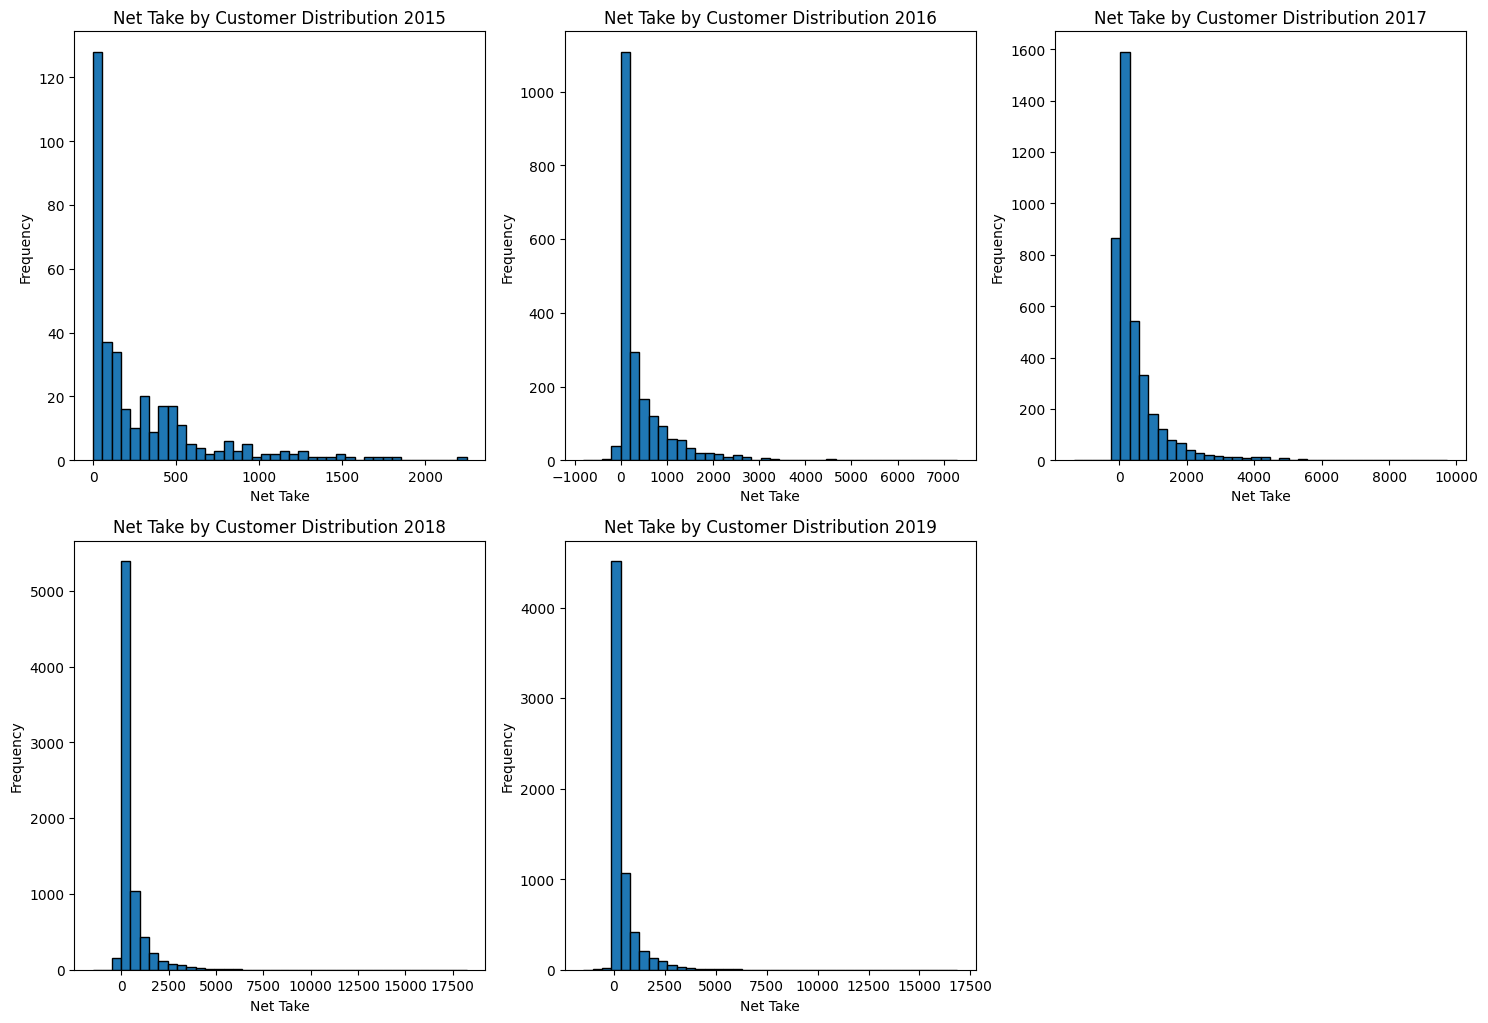

In [109]:
years = ['2015', '2016', '2017', '2018', '2019']
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, year in enumerate(years):
    ax = axes[i//3, i%3]
    
    # Get the data for the specific year
    data = employer_data[employer_data['year'] == year]['revenue_minus_direct_costs']
    
    # Plot the histogram on the current subplot
    ax.hist(data, bins=40, edgecolor='black')
    
    # Adding titles and labels
    ax.set_title(f'Net Take by Customer Distribution {year}')
    ax.set_xlabel('Net Take')
    ax.set_ylabel('Frequency')

# Hide the remaining subplots
for i in range(len(years), 9):
    fig.delaxes(axes.flatten()[i])

# Display the plot
plt.tight_layout()
plt.show()

Find customers who only lost money, and show retention

Find customers who lost money more than they gained money, and show retention

Find customers who never lost money, and show retention

# Other idea

Try to model probability of losing money

In [110]:
employer_data['month'] 
employer_data


,month,employer_id,market,revenue,revenue_minus_direct_costs,year,percent_take
0,2015-01-01,9chMy7swbDZ3sqaDCqLlLUQDsMY=,sf-bay-area,0.0,0.000000,2015,0.00000
1,2015-01-01,3laXJ20VXJNgfEa0zEbBnjD3Cos=,sf-bay-area,250.0,50.000000,2015,20.00000
2,2015-01-01,nHCU9OfsFRequzQshFD1qypEJVc=,sf-bay-area,250.0,0.000000,2015,0.00000
3,2015-01-01,khcezEHqw5MZCSE5QdioEP08ZaI=,other,0.0,0.000000,2015,0.00000
4,2015-02-01,ldW+l2PmzbyDN38Q2cKswMNO6k0=,sf-bay-area,0.0,0.000000,2015,0.00000
...,...,...,...,...,...,...,...
20632,2019-06-01,KC85QAzzUqt9y9ITLcFaB6dC3Ik=,new-york-city,0.0,0.000000,2019,0.00000
20633,2019-06-01,ptpvuPAG7OhOO0EviZbixX+5An4=,los-angeles,1150.5,230.100000,2019,20.00000
20634,2019-06-01,4C67rtvvKRW/9wUZUQ0CtRXRx0Q=,new-york-city,0.0,0.000000,2019,0.00000
20635,2019-06-01,NsHaIczTmeStIgw5E0TfDe96RjE=,washington-dc,202.5,52.500008,2019,25.92593


In [117]:
employer_data['just_month'] = employer_data['month'].apply(lambda x: int(x[5:7]))

In [119]:
employer_data['year'] = employer_data['year'].apply(lambda x: int(x))

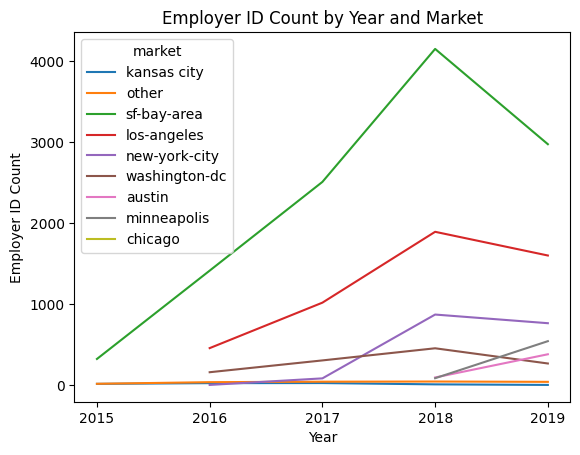

In [133]:
sns.lineplot(x='year', y='employer_id_count', hue='market', data=result)

# Set plot title and labels
plt.title('Employer ID Count by Year and Market')
plt.xlabel('Year')
plt.ylabel('Employer ID Count')

# Display the plot
plt.show()

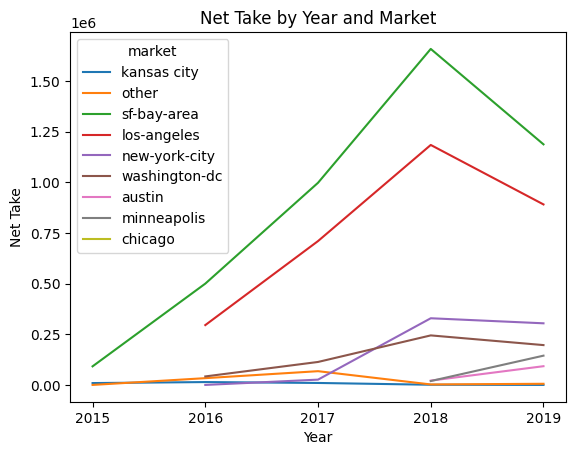

In [44]:
sns.lineplot(x='year', y='revenue_minus_direct_costs_sum', hue='market', data=result)

# Set plot title and labels
plt.title('Net Take by Year and Market')
plt.xlabel('Year')
plt.ylabel('Net Take')

# Display the plot
plt.show()

## Distribution of net take for all customers, bottom quartile, and top quartile of customers

In [25]:

data = [
    {'lat': 40.7128, 'lon': -74.0060, 'size': 100, 'color': 'red'}, 
    {'lat': 34.0522, 'lon': -118.2437, 'size': 200, 'color': 'blue'}, 
    {'lat': 41.8781, 'lon': -87.6298, 'size': 150, 'color': 'green'}
]



def plot_customer_map(data):
    usa = gpd.read_file('cb_2020_us_state_5m.zip')

    lower_48 = usa[~usa.STUSPS.isin(['AK', 'HI', 'VI', 'MP', 'GU', 'AS', 'PR'])]

    geometry = [Point(xy) for xy in zip([d['lon'] for d in data], [d['lat'] for d in data])]
    gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")

    fig, ax = plt.subplots(figsize=(15, 15))
    lower_48 = lower_48.to_crs(epsg=3857)
    lower_48.plot(ax=ax, color='lightgrey', edgecolor='k', alpha=0.5)

    ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

    gdf.to_crs(epsg=3857).plot(ax=ax, color=gdf['color'], alpha=0.5, markersize=gdf['size']*10)

    plt.title('Customized Circles on Lower 48 States', fontdict={'fontsize': '25', 'fontweight': '3'})
    plt.xlabel('Longitude', fontsize=14)
    plt.ylabel('Latitude', fontsize=14)

    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

    plt.show()